In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [32]:
# dataset from ranked challenger last updated 2020
df = pd.read_csv("ranked_challenger.csv")
df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [33]:
# drop gameID and repeating features for red side
X = df.loc[:,["gameDuraton", "blueFirstBlood", "blueFirstTower", "blueFirstBaron", "blueFirstDragon", "blueFirstInhibitor",
          "blueDragonKills", "blueBaronKills", "blueTowerKills", "blueInhibitorKills", "blueWardPlaced", "blueWardkills",
         "blueKills", "blueDeath", "blueAssist", "blueChampionDamageDealt", "blueTotalGold", "blueTotalMinionKills",
         "blueTotalLevel", "blueAvgLevel", "blueJungleMinionKills", "blueKillingSpree", "blueTotalHeal", "blueObjectDamageDealt"]]

y = df["blueWins"]

In [34]:
# blue team
blue_df = df.iloc[0: ,1:26]
blue_df

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,1,2,2,11,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,50,99418,41437,438,60,12.0,106,8,20122,13309
26900,970,0,1,1,0,1,0,3,0,5,...,36,61816,61221,346,65,13.0,28,5,32837,44640
26901,1480,0,1,1,0,1,0,1,0,4,...,19,51604,45013,568,63,12.6,132,4,18131,45242
26902,1837,1,1,0,0,1,0,3,0,5,...,66,93059,58160,640,76,15.2,168,7,75427,60486


In [35]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_sc)[:,1] >=threshold)
    success_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','success'],
           yticklabels=['fail','success']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

1    0.500074
0    0.499926
Name: blueWins, dtype: float64


<AxesSubplot:>

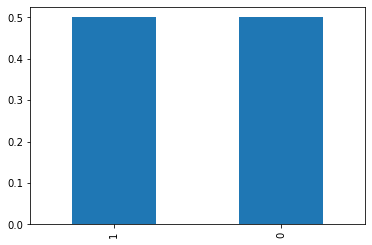

In [36]:
#checking imbalance
target_pcts = blue_df.blueWins.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

1    13454
0    13450
Name: blueWins, dtype: int64
1    0.500074
0    0.499926
Name: blueWins, dtype: float64


/home/munwon/ENTER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


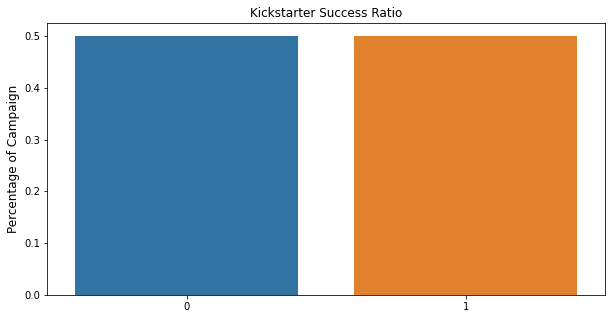

In [77]:
print(blue_df.blueWins.value_counts())
target = blue_df.blueWins.value_counts(normalize=True) 
print(target)
plt.figure(figsize=(10,5))
sns.barplot(target.index, target.values)
plt.title('Kickstarter Success Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

## Baseline Subset 1

In [79]:
# baselining with small subset of features
subset_1 = blue_df.loc[:,['gameDuraton','blueWins','blueFirstTower', 'blueKills', 'blueTotalGold']]
subset_1.head()

,gameDuraton,blueWins,blueFirstTower,blueKills,blueTotalGold
0,1323,0,0,15,37001
1,1317,1,0,19,41072
2,932,0,0,5,22929
3,2098,0,0,26,63447
4,2344,1,1,27,74955


In [80]:
X, y = subset_1.drop(['blueWins'], axis=1), subset_1.blueWins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [81]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)
lr_confusion = confusion_matrix(y_test, lr_pred)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2662
           1       0.79      0.81      0.80      2719

    accuracy                           0.79      5381
   macro avg       0.79      0.79      0.79      5381
weighted avg       0.79      0.79      0.79      5381



In [82]:
print(f' Accuracy: {lr_ac}')
print(f' Precision: {lr_precision}')
print(f' Recall: {lr_recall}')
print(f' F1: {lr_f1}')
print(f' ROC: {roc_auc_lr}')

 Accuracy: 0.792046088087716
 Precision: 0.7863278453829635
 Recall: 0.8080176535490989
 F1: 0.7970252131325957
 ROC: 0.8620512524354177


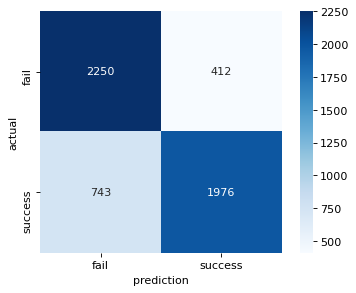

In [83]:
make_confusion_matrix(lr)
plt.savefig('confusion_matrix_1.png');

## Baseline Subset 2 - with continuous features

In [12]:
subset_2 = blue_df.loc[:,['blueWins','blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueDeath', 'blueAssist']]
subset_2.head()

,blueWins,blueInhibitorKills,blueWardPlaced,blueWardkills,blueDeath,blueAssist
0,0,0,38,13,31,22
1,1,0,57,18,8,31
2,0,0,28,7,20,8
3,0,0,129,39,36,45
4,1,3,114,35,40,47


In [13]:
X, y = subset_2.drop(['blueWins'], axis=1), subset_2.blueWins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
lr2 = LogisticRegression()
lr2.fit(X_train_sc, y_train)
lr2_pred = lr2.predict(X_test_sc)
lr2_confusion = confusion_matrix(y_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc, y_test)
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall = recall_score(y_test, lr2_pred)
lr2_f1 = f1_score(y_test, lr2_pred)

lr2_y_score = lr2.predict_proba(X_test_sc)[:,1]
lr2_fpr, lr2_tpr, lr2_auc_thresholds = roc_curve(y_test, lr2_y_score)
roc_auc_lr2 = auc(lr2_fpr, lr2_tpr)

print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2662
           1       0.94      0.95      0.95      2719

    accuracy                           0.95      5381
   macro avg       0.95      0.95      0.95      5381
weighted avg       0.95      0.95      0.95      5381



In [15]:
print(f' Accuracy: {lr2_ac}')
print(f' Precision: {lr2_precision}')
print(f' Recall: {lr2_recall}')
print(f' F1: {lr2_f1}')
print(f' ROC: {roc_auc_lr2}')

 Accuracy: 0.9451774763055194
 Precision: 0.9416909620991254
 Recall: 0.9503493931592497
 F1: 0.9460003660992129
 ROC: 0.978553195381362


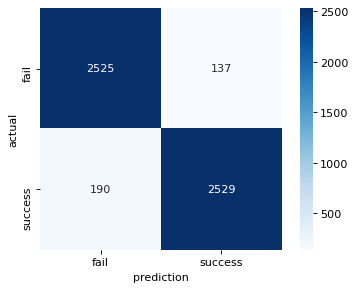

In [16]:
make_confusion_matrix(lr2)

## All features included

In [88]:
X, y = blue_df.drop(['blueWins'], axis=1), blue_df.blueWins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [89]:
lr_all = LogisticRegression(C=1000) #no regularization
lr_all.fit(X_train_sc, y_train)
lr_all_pred = lr_all.predict(X_test_sc)
lr_all_confusion = confusion_matrix(y_test, lr_all_pred)

lr_all_ac = lr_all.score(X_test_sc, y_test)
lr_all_precision = precision_score(y_test, lr_all_pred)
lr_all_recall = recall_score(y_test, lr_all_pred)
lr_all_f1 = f1_score(y_test, lr_all_pred)

lr_all_y_score = lr_all.predict_proba(X_test_sc)[:,1]
lr_all_fpr, lr_all_tpr, lr_all_auc_thresholds = roc_curve(y_test, lr_all_y_score)
roc_auc_lr_all = auc(lr_all_fpr, lr_all_tpr)

print(classification_report(y_test, lr_all_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2662
           1       0.97      0.97      0.97      2719

    accuracy                           0.97      5381
   macro avg       0.97      0.97      0.97      5381
weighted avg       0.97      0.97      0.97      5381



In [90]:
print(f' Accuracy: {lr_all_ac}')
print(f' Precision: {lr_all_precision}')
print(f' Recall: {lr_all_recall}')
print(f' F1: {lr_all_f1}')
print(f' ROC: {roc_auc_lr_all}')

 Accuracy: 0.9726816576844453
 Precision: 0.9720998531571219
 Recall: 0.9738874586244943
 F1: 0.9729928348337314
 ROC: 0.9955511055711969


## Coefficients for logistic regression

In [91]:
print(lr_all.coef_, lr_all.intercept_)

[[-3.44098628 -0.1678801  -0.11826879 -0.21881426  0.00573634 -0.1016641
   0.69895758  0.7416317   3.04841169  0.49252371 -0.30673046 -0.0469197
   2.4925828  -3.89239562  0.77875313  0.59087411 -0.49199774  1.76739071
   0.48360325  0.48360325 -0.04686876  0.01381802  0.13239688 -0.77435344]] [0.16976516]


In [92]:
lr_all.coef_

array([[-3.44098628, -0.1678801 , -0.11826879, -0.21881426,  0.00573634,
        -0.1016641 ,  0.69895758,  0.7416317 ,  3.04841169,  0.49252371,
        -0.30673046, -0.0469197 ,  2.4925828 , -3.89239562,  0.77875313,
         0.59087411, -0.49199774,  1.76739071,  0.48360325,  0.48360325,
        -0.04686876,  0.01381802,  0.13239688, -0.77435344]])

In [94]:
logreg = LogisticRegression()
logreg.fit(X, y)
log_odds = logreg.coef_[0]

pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

/home/munwon/ENTER/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,coef
blueAssist,1.218319e-01
blueKills,5.049696e-02
blueJungleMinionKills,3.092399e-02
blueTotalLevel,2.865140e-02
blueTowerKills,2.171223e-02
blueTotalMinionKills,1.477354e-02
blueKillingSpree,1.333046e-02
blueAvgLevel,5.730281e-03
blueInhibitorKills,5.428843e-03
blueFirstInhibitor,3.797747e-03


In [43]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
blueAssist,1.129564
blueKills,1.051794
blueJungleMinionKills,1.031407
blueTotalLevel,1.029066
blueTowerKills,1.021950
blueTotalMinionKills,1.014883
blueKillingSpree,1.013420
blueAvgLevel,1.005747
blueInhibitorKills,1.005444
blueFirstInhibitor,1.003805


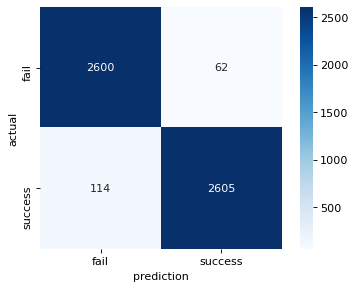

In [87]:
make_confusion_matrix(lr_all)
#plt.savefig('confusion_matrix_graph.png');

## Graph of subset 1, subset 2, all features

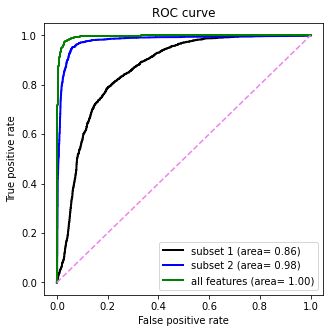

In [45]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='black', lw=lw, 
         label='subset 1 (area= %0.2f)' %roc_auc_lr)
plt.plot(lr2_fpr, lr2_tpr, color='blue', lw=lw, 
         label='subset 2 (area= %0.2f)' %roc_auc_lr2)
plt.plot(lr_all_fpr, lr_all_tpr, color='green', lw=lw, 
         label='all features (area= %0.2f)' %roc_auc_lr_all)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right');

In [46]:
X, y = blue_df.drop(['blueWins'], axis=1), blue_df.blueWins

X_mid, X_test, y_mid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)


# #Split data into 3: 60% train, 20% validation, 20% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

## KNN

In [47]:
# initiate model and calculate error metrics
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_val_sc)
knn_confusion = confusion_matrix(y_val,knn_pred)

knn_ac = knn.score(X_val_sc, y_val)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred)

print(classification_report(y_val, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2184
           1       0.93      0.96      0.95      2121

    accuracy                           0.95      4305
   macro avg       0.95      0.95      0.95      4305
weighted avg       0.95      0.95      0.95      4305



In [48]:
print('KNN validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (knn_ac, 
         knn_precision, 
         knn_recall,
         knn_f1)
     )

KNN validation metrics: 
 Accuracy: 0.9468 
 Precision: 0.9300 
 Recall: 0.9646 
 F1: 0.9470


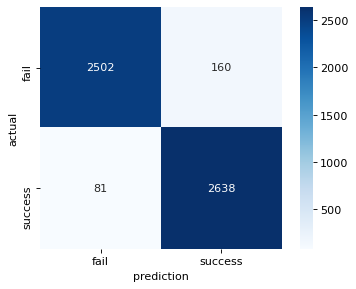

In [49]:
make_confusion_matrix(knn)

In [50]:
knn_y_score = knn.predict_proba(X_val_sc)[:,1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_val, knn_y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(roc_auc_knn)

0.9814703997872315


## Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_val_sc)

lr_ac = lr.score(X_val_sc, y_val)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1 = f1_score(y_val, lr_pred)

print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2184
           1       0.96      0.97      0.96      2121

    accuracy                           0.96      4305
   macro avg       0.96      0.96      0.96      4305
weighted avg       0.96      0.96      0.96      4305



In [52]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1)
     )

Logistic Regression validation metrics: 
 Accuracy: 0.9640 
 Precision: 0.9598 
 Recall: 0.9675 
 F1: 0.9636


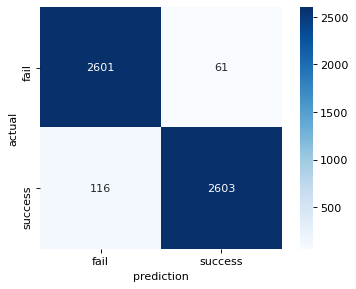

In [53]:
make_confusion_matrix(lr)

In [54]:
lr_y_score = lr.predict_proba(X_val_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_val, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)
print(roc_auc_lr)

0.9934716587828327


## Decision Tree

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

dt_ac = dt.score(X_val, y_val)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1 = f1_score(y_val, dt_pred)

print(classification_report(y_val, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2184
           1       0.96      0.95      0.95      2121

    accuracy                           0.95      4305
   macro avg       0.95      0.95      0.95      4305
weighted avg       0.95      0.95      0.95      4305



In [56]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (dt_ac, 
         dt_precision, 
         dt_recall,
         dt_f1)
     )

Decision Tree validation metrics: 
 Accuracy: 0.9545 
 Precision: 0.9555 
 Recall: 0.9519 
 F1: 0.9537


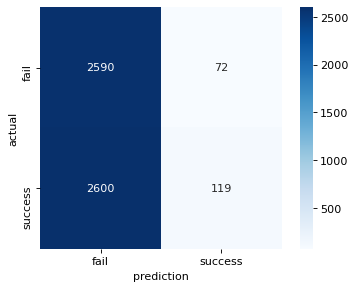

In [57]:
make_confusion_matrix(dt)

In [58]:
dt_y_score = dt.predict_proba(X_val)[:, 1]
dt_fpr, dt_tpr, auc_thresholds = roc_curve(y_val, dt_y_score)
roc_auc_dt = auc(dt_fpr, dt_tpr)
print(roc_auc_dt)

0.9544345918108295


## Random Forest

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_confusion = confusion_matrix(y_val, rf_pred)

rf_ac = rf.score(X_val, y_val)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred)

print(classification_report(y_val, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2184
           1       0.96      0.98      0.97      2121

    accuracy                           0.97      4305
   macro avg       0.97      0.97      0.97      4305
weighted avg       0.97      0.97      0.97      4305



In [60]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (rf_ac, 
         rf_precision, 
         rf_recall,
         rf_f1)
     )

Random Forest validation metrics: 
 Accuracy: 0.9691 
 Precision: 0.9606 
 Recall: 0.9774 
 F1: 0.9689


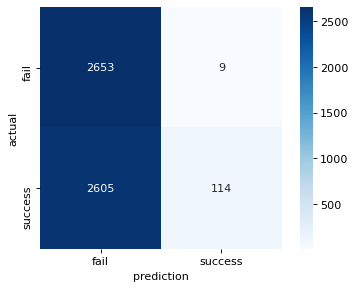

In [61]:
make_confusion_matrix(rf)

In [62]:
rf_y_score = rf.predict_proba(X_val)[:, 1]
rf_fpr, rf_tpr, auc_thresholds = roc_curve(y_val, rf_y_score)
roc_auc_rf = auc(rf_fpr, rf_tpr)
print(roc_auc_rf)

0.9958837622380762


In [71]:
importancedf = pd.Series(rf.feature_importances_, index = X_train.columns)

<AxesSubplot:>

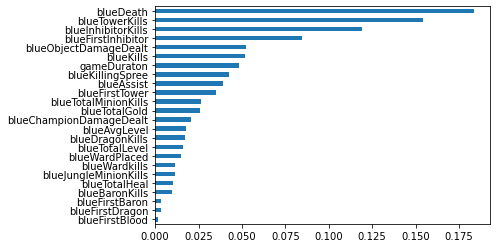

In [72]:
importancedf.sort_values().plot(kind='barh')

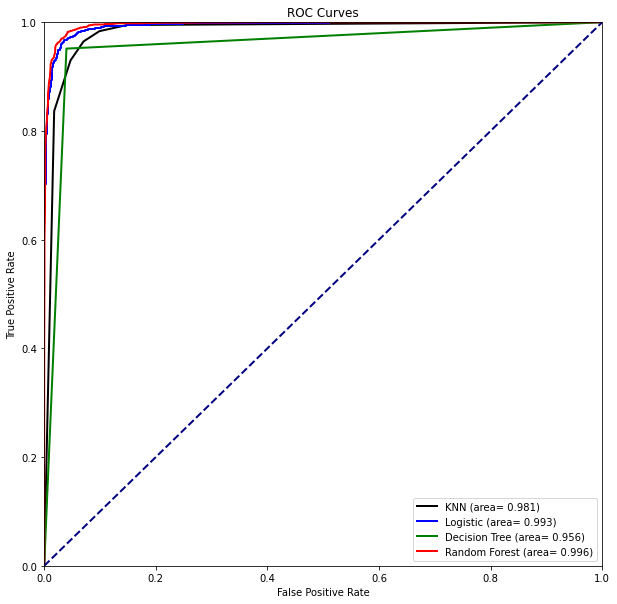

In [94]:
# all models ROC Curve comparison
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='black', lw=lw, 
         label='KNN (area= %0.3f)' %roc_auc_knn)
plt.plot(lr_fpr, lr_tpr, color='blue', lw=lw, 
         label='Logistic (area= %0.3f)' %roc_auc_lr)
plt.plot(dt_fpr, dt_tpr, color='green', lw=lw, 
         label='Decision Tree (area= %0.3f)' %roc_auc_dt)
plt.plot(rf_fpr, rf_tpr, color='red', lw=lw, 
         label='Random Forest (area= %0.3f)' %roc_auc_rf)

plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right');
plt.savefig('all_ROC_curves.png');